In [102]:
import pandas as pd
import numpy as np

В датасете присутствуют категориальные признаки, нужно переделать их в числовые.

In [103]:
df = pd.read_csv('heart.csv')
df.head(15)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Пропущенные значения отсутствуют

In [105]:
df.isna()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [106]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [107]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

LabelEncoder принимаем к бинарным столбцам (Где имеются только два уникальных значения), для столбцов где имеется более 2-ух уникальных признаков мы используем OneHotEncoder.

Также преобразовываем наши столбцы (Изначально они в виде обычного одномерного массива) с помощью np.reshape в двумерный массив, (N столбцов, 1 колонка). Значение -1 автоматически определяет сколько столбцов подставлять.

In [108]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
ohe = OneHotEncoder(sparse_output=False)

df['Sex'] = le.fit_transform(df['Sex'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ChestPainType'] = ohe.fit_transform(df['ChestPainType'].values.reshape(-1,1))
df['RestingECG'] = ohe.fit_transform(df['RestingECG'].values.reshape(-1,1))
df['ST_Slope'] = ohe.fit_transform(df['ST_Slope'].values.reshape(-1,1))



In [109]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0.0,140,289,0,0.0,172,0,0.0,0.0,0
1,49,0,0.0,160,180,0,0.0,156,0,1.0,0.0,1
2,37,1,0.0,130,283,0,0.0,98,0,0.0,0.0,0
3,48,0,1.0,138,214,0,0.0,108,1,1.5,0.0,1
4,54,1,0.0,150,195,0,0.0,122,0,0.0,0.0,0


С помощью методов главных компонент, все наши столбцы мы объединили в двухмерное пространство, также подобрали важные значения которые могут повлиять на обучение.

Смотря на график ниже, можем сказать, что все наши данные по факту линейно неразделимы. Также один из призраков дает аномальные вбросы в левой части графика, Значит логистическая регрессия даст ограниченные точности.

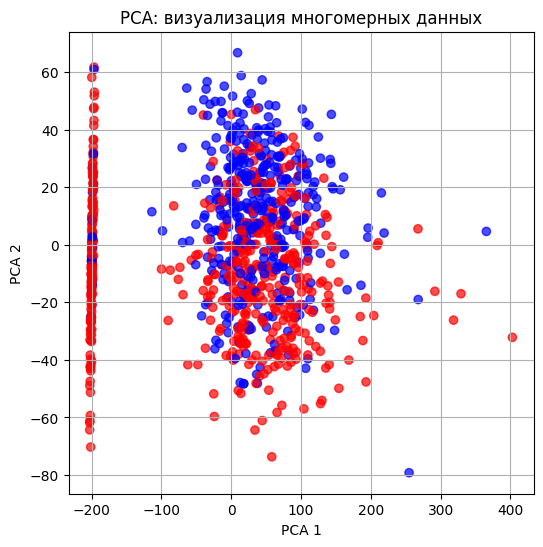

In [110]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_1 = df.drop('HeartDisease', axis=1)
y_1 = df['HeartDisease']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_1)

plt.figure(figsize=(6,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_1, cmap='bwr', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA: визуализация многомерных данных')
plt.grid(True)
plt.show()

Дисбаланс в классах есть, но он незначительный.

In [111]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

Важными признаками являются Age, Sex, FastingBS, MaxHR, ExerciseAngina, OldPeak. Но выкидывать что-то явно не стоит, так как это линейные связи.

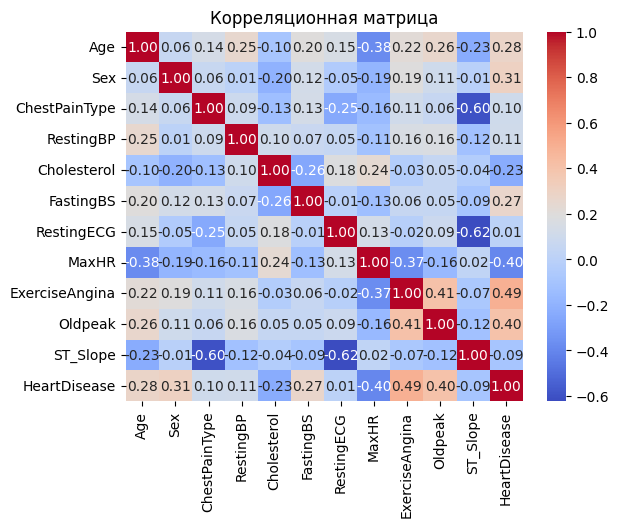

In [112]:
import seaborn as sns
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

class_weight помогает штрафовать за неверные предсказания класса 1 сильнее.

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.drop(['HeartDisease', 'ST_Slope', 'RestingECG'], axis=1)
y = df['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

LR = LogisticRegression(class_weight={0: 1,
                                      1: 3})
LR.fit(x_train, y_train)
y_pred1 = LR.predict(x_test)
y_probs = LR.predict_proba(x_test)[:, 1]
score = LR.score(x_test, y_test)

print(score)



0.7739130434782608


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


recall класса 1 высокий, в целом это хорошо. Модель редко пропускает больных
recall класса 0 достаточно маленький, модель часто ошибается в пользу положительного класса.

Precision 0.75, теперь больше ложных тревог. Но лучше мы здорового определим как больного, чем мы вообще пропустим больного.


In [126]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_test, y_pred1)
print(classification_report(y_test, y_pred1))
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.83      0.59      0.69        98
           1       0.75      0.91      0.82       132

    accuracy                           0.77       230
   macro avg       0.79      0.75      0.76       230
weighted avg       0.78      0.77      0.77       230

[[ 58  40]
 [ 12 120]]


In [119]:
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve

#precision-recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)

#roc_auc
fpr, tpr, thresholds_roc = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

Ниже представлены ROC-AUC кривая. Показатель 0,91 очень хороший, так как она угадывает наши значения не случайно

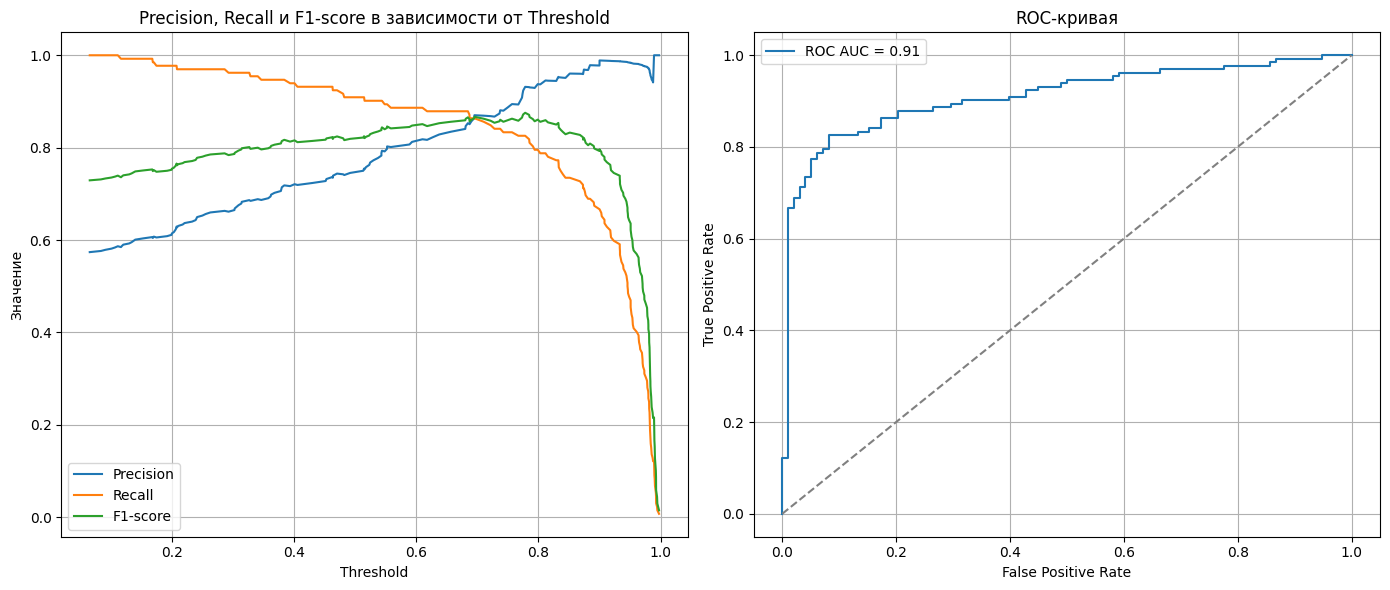

In [120]:
# правильно: f1_scores, а не f1_score
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

plt.figure(figsize=(14, 6))

# График Precision-Recall по threshold
plt.subplot(1, 2, 1)
plt.plot(thresholds_pr, precision[:-1], label="Precision")
plt.plot(thresholds_pr, recall[:-1], label="Recall")
plt.plot(thresholds_pr, f1_scores[:-1], label="F1-score")
plt.xlabel("Threshold")
plt.ylabel("Значение")
plt.title("Precision, Recall и F1-score в зависимости от Threshold")
plt.legend()
plt.grid(True)

# ROC-кривая
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f"ROC AUC = {%:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Здесь применяем подбор параметров для случайного леса. Для точного перебора можно взять GridSearchCV, но нужно будет сужать диапозон параметров, так как это может быть высокозатратно.

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier()

n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rs = RandomizedSearchCV(rfc,
                        param_dist,
                        n_iter = 100,
                        cv = 3,
                        verbose = 1,
                        n_jobs=-1,
                        random_state=0)

rs.fit(x_train, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for 

{'n_estimators': 1000,
 'min_samples_split': 12,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [125]:
from sklearn.metrics import confusion_matrix


rf = RandomForestClassifier(n_estimators=1000, min_samples_split=12, min_samples_leaf=7, max_features='sqrt', max_depth=10, bootstrap=True)

rf.fit(x_train, y_train)
y_pred_2 = rf.predict(x_test)

confusion_matrix_2 = confusion_matrix(y_test, y_pred_2)
print(confusion_matrix_2)
print(classification_report(y_test, y_pred_2))


[[ 84  14]
 [ 24 108]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        98
           1       0.89      0.82      0.85       132

    accuracy                           0.83       230
   macro avg       0.83      0.84      0.83       230
weighted avg       0.84      0.83      0.84       230

